<a href="https://colab.research.google.com/github/M-Awwab-Khan/most-comprehensive-movies-analysis/blob/main/Most_Comprehensive_Movies_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Most Comprehensive Movies Analysis

## Download Dataset from Kaggle

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('key')
os.environ["KAGGLE_USERNAME"] = userdata.get('username')

In [3]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

 95% 217M/228M [00:01<00:00, 103MB/s]
100% 228M/228M [00:02<00:00, 118MB/s]


In [4]:
! unzip "the-movies-dataset.zip"

Archive:  the-movies-dataset.zip
  inflating: credits.csv             
  inflating: keywords.csv            
  inflating: links.csv               
  inflating: links_small.csv         
  inflating: movies_metadata.csv     
  inflating: ratings.csv             
  inflating: ratings_small.csv       


## Loading Required Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## CSV to Dataframe

In [42]:
movies = pd.read_csv('movies_metadata.csv')
keywords = pd.read_csv('keywords.csv')
credits = pd.read_csv('credits.csv')

<ipython-input-42-07bc07df984d>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movies_metadata.csv')


In [43]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [44]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [45]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


Before moving on, let's join these datasets on id column

In [47]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [51]:
keywords.id = keywords.id.astype('str')
movies = movies.merge(keywords, on='id')

In [55]:
credits.id = credits.id.astype('str')
movies = movies.merge(credits, on='id')

In [56]:
movies.shape

(46628, 27)

There are total 900K+ rows and 25 Features in our dataset. Such a huge number. Now let's analyze the datatypes of different features

In [70]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46628 entries, 0 to 46627
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                46628 non-null  object 
 1   genres                46628 non-null  object 
 2   id                    46628 non-null  object 
 3   imdb_id               46611 non-null  object 
 4   original_language     46617 non-null  object 
 5   original_title        46628 non-null  object 
 6   overview              45633 non-null  object 
 7   popularity            46624 non-null  object 
 8   poster_path           46229 non-null  object 
 9   production_companies  46624 non-null  object 
 10  production_countries  46624 non-null  object 
 11  revenue               46624 non-null  float64
 12  runtime               46360 non-null  float64
 13  spoken_languages      46624 non-null  object 
 14  status                46542 non-null  object 
 15  title              

Let's first of all convert release date column to pandas datetime using pd.to_datetime

In [58]:
# df['release_year'] = pd.to_datetime(df['release_date']).dt.year
movies = movies[~(movies["release_date"].str.len() < 6)]
movies['release_year'] = pd.to_datetime(movies['release_date']).dt.year

In [60]:
movies['release_year'] = movies['release_year'].astype(int, errors='ignore')
movies['release_year'].value_counts()

release_year
2014.0    2057
2015.0    2046
2013.0    1953
2012.0    1786
2011.0    1722
          ... 
2020.0       1
1887.0       1
1878.0       1
1874.0       1
1883.0       1
Name: count, Length: 135, dtype: int64

Let's analyze missing values

<Axes: >

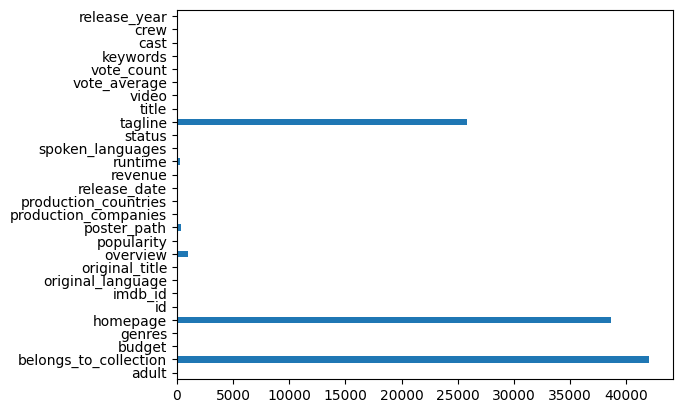

In [62]:
movies.isna().sum().plot(kind='barh')

## Handling Missing Values

Let's now remove unwanted columns from our dataset

In [63]:
columns_to_remove = ['belongs_to_collection', 'adult', 'tagline', 'homepage', 'release_date']
movies = movies.drop(columns=columns_to_remove)

<Axes: >

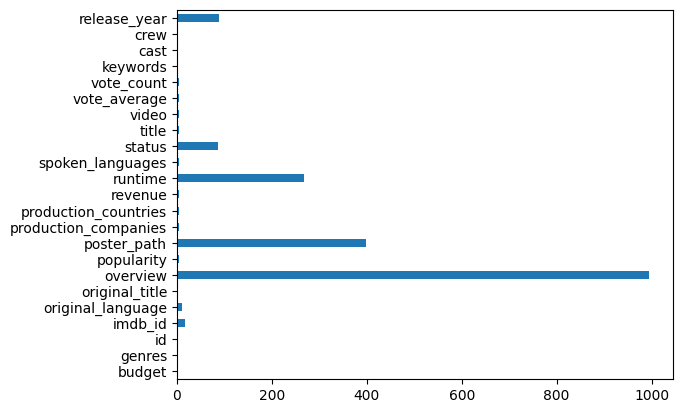

In [64]:
movies.isna().sum().plot(kind='barh')

In [67]:
import ast
def preprocess(text):
  lst = [dictionary['name'] for dictionary in ast.literal_eval(text)]
  return ', '.join(lst)

In [ ]:
movies.genres = movies.genres.apply(preprocess)

In [72]:
movies.cast = movies.cast.apply(preprocess)

In [84]:
print(movies.iloc[0].crew)

[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'profile_path': '/v79vlRYi94BZUQnkkyznbGUZLjT.jpg'}, {'credit_id': '52fe4284c3a36847f8024f67', 'depart

In [76]:
movies['director'] = movies['crew'].apply(lambda x: ast.literal_eval(x)[0]['name'] if ast.literal_eval(x) else '')

In [91]:
movies['production_companies']

0           [{'name': 'Pixar Animation Studios', 'id': 3}]
1        [{'name': 'TriStar Pictures', 'id': 559}, {'na...
2        [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
3        [{'name': 'Twentieth Century Fox Film Corporat...
4        [{'name': 'Sandollar Productions', 'id': 5842}...
                               ...                        
46623                                                   []
46624               [{'name': 'Sine Olivia', 'id': 19653}]
46625    [{'name': 'American World Pictures', 'id': 6165}]
46626                 [{'name': 'Yermoliev', 'id': 88753}]
46627                                                   []
Name: production_companies, Length: 46628, dtype: object

In [90]:
movies['production_company'] = movies['production_companies'].apply(lambda x: ast.literal_eval(x)[0]['name'] if ast.literal_eval(x) else '')
movies['production_company']

ValueError: malformed node or string: nan

In [80]:
def extract_writer(text):
  for dictionary in ast.literal_eval(text):
    if dictionary['department'] == 'Writing':
      return dictionary['name']
  return ''

In [82]:
movies['writer'] = movies.crew.apply(extract_writer)

In [85]:
def extract_producer(text):
  for dictionary in ast.literal_eval(text):
    if dictionary['job'] == 'Producer':
      return dictionary['name']
  return ''

In [86]:
movies['producer'] = movies.crew.apply(extract_producer)
movies['producer']

0              Bonnie Arnold
1               Scott Kroopf
2                           
3                Ronald Bass
4               Nancy Meyers
                ...         
46623       Hamid Nematollah
46624                       
46625                       
46626    Joseph N. Ermolieff
46627                       
Name: producer, Length: 46628, dtype: object

In [ ]:
movies.drop(columns=['crew'], inplace=True)

In [83]:
movies.keywords = movies.keywords.apply(preprocess)
movies.keywords

0        jealousy, toy, boy, friendship, friends, rival...
1        board game, disappearance, based on children's...
2        fishing, best friend, duringcreditsstinger, ol...
3        based on novel, interracial relationship, sing...
4        baby, midlife crisis, confidence, aging, daugh...
                               ...                        
46623                                          tragic love
46624                                  artist, play, pinoy
46625                                                     
46626                                                     
46627                                                     
Name: keywords, Length: 46628, dtype: object

In [89]:
movies.head(1)

,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,video,vote_average,vote_count,keywords,cast,crew,release_year,director,writer,producer
0,30000000,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,False,7.7,5415.0,"jealousy, toy, boy, friendship, friends, rival...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995.0,John Lasseter,Joss Whedon,Bonnie Arnold


In [78]:
movies.genres = movies.genres.str.split(', ')

In [79]:
movies.explode('genres', ignore_index=True)

,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,status,title,video,vote_average,vote_count,keywords,cast,crew,release_year,director
0,30000000,Animation,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,Released,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995.0,John Lasseter
1,30000000,Comedy,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,Released,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995.0,John Lasseter
2,30000000,Family,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,Released,Toy Story,False,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",1995.0,John Lasseter
3,65000000,Adventure,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,Released,Jumanji,False,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",1995.0,Larry J. Franco
4,65000000,Fantasy,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",...,Released,Jumanji,False,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",1995.0,Larry J. Franco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95861,0,Action,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]",...,Released,Betrayal,False,3.8,6.0,[],"Erika Eleniak, Adam Baldwin, Julie du Page, Ja...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",2003.0,Mark L. Lester
95862,0,Drama,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]",...,Released,Betrayal,False,3.8,6.0,[],"Erika Eleniak, Adam Baldwin, Julie du Page, Ja...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",2003.0,Mark L. Lester
95863,0,Thriller,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]",...,Released,Betrayal,False,3.8,6.0,[],"Erika Eleniak, Adam Baldwin, Julie du Page, Ja...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de...",2003.0,Mark L. Lester
95864,0,,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 88753}]",...,Released,Satan Triumphant,False,0.0,0.0,[],"Iwan Mosschuchin, Nathalie Lissenko, Pavel Pav...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de...",1917.0,Yakov Protazanov
